<a href="https://colab.research.google.com/github/maadmaaax/Project_NBA_GroupM/blob/main/Analyse_Principale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Import clean and Merge**

In [1]:
!pip install requests beautifulsoup4 pandas #requestsfetches the page,beautifulsoup4finds the data on the page, andpandas` organizes it into a table.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import numpy as np
import statsmodels.api as sm
from pandas.plotting import table
from google.colab import files
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.cm as cm

#Importing all the packages we will use

In [3]:
!git clone https://github.com/maadmaaax/Project_NBA_GroupM
#Load Player stat data set
rs2005=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2005.csv')
rs2006=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2006.csv')
rs2007=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2007.csv')
rs2008=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2008.csv')
rs2009=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2009.csv')
rs2010=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2010.csv')
rs2011=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2011.csv')
rs2012=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2012.csv')
rs2013=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2013.csv')
rs2014=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2014.csv')
rs2015=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2015.csv')
rs2016=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2016.csv')
rs2017=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2017.csv')
rs2018=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2018.csv')
rs2019=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2019.csv')
rs2020=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2020.csv')
rs2021=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2021.csv')
rs2022=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2022.csv')
rs2023=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2023.csv')
rs2024=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2024.csv')
rs2025=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2025.csv')
rs2026=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2026.csv')
#Load teams result data sets
st2005=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2005.csv')
st2006=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2006.csv')
st2007=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2007.csv')
st2008=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2008.csv')
st2009=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2009.csv')
st2010=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2010.csv')
st2011=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2011.csv')
st2012=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2012.csv')
st2013=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2013.csv')
st2014=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2014.csv')
st2015=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2015.csv')
st2016=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2016.csv')
st2017=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2017.csv')
st2018=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2018.csv')
st2019=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2019.csv')
st2020=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2020.csv')
st2021=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2021.csv')
st2022=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2022.csv')
st2023=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2023.csv')
st2024=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2024.csv')
st2025=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2025.csv')

Cloning into 'Project_NBA_GroupM'...
remote: Enumerating objects: 796, done.
remote: Counting objects: 100% (270/270), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 796 (delta 255), reused 225 (delta 225), pack-reused 526 (from 2)
Receiving objects: 100% (796/796), 19.66 MiB | 13.33 MiB/s, done.
Resolving deltas: 100% (353/353), done.


In [4]:
#Changing full team name to 3letter code to keep consistent with the rs dataset
# +Making sure to update team name to their current one
team_replacements = {
    "Atlanta Hawks": "ATL",
    "Boston Celtics": "BOS",
    "Brooklyn Nets": "BRK",
    "New Jersey Nets": "BRK",
    "NJN":"BRK",
    "Charlotte Hornets": "CHO",
    "Charlotte Bobcats": "CHO",
    "CHA":"CHO",
    "Chicago Bulls": "CHI",
    "Cleveland Cavaliers": "CLE",
    "Dallas Mavericks": "DAL",
    "Denver Nuggets": "DEN",
    "Detroit Pistons": "DET",
    "Golden State Warriors": "GSW",
    "Houston Rockets": "HOU",
    "Indiana Pacers": "IND",
    "Los Angeles Clippers": "LAC",
    "Los Angeles Lakers": "LAL",
    "Memphis Grizzlies": "MEM",
    "Miami Heat": "MIA",
    "Milwaukee Bucks": "MIL",
    "Minnesota Timberwolves": "MIN",
    "New Orleans Pelicans": "NOP",
    "New Orleans Hornets": "NOP",
    "NOH": "NOP",
    "New Orleans/Oklahoma City Hornets": "NOP",
    "NOK": "NOP",
    "New York Knicks": "NYK",
    "Oklahoma City Thunder": "OKC",
    "Seattle SuperSonics": "OKC",
    "SEA": "OKC",
    "Orlando Magic": "ORL",
    "Philadelphia 76ers": "PHI",
    "Phoenix Suns": "PHO",
    "Portland Trail Blazers": "POR",
    "Sacramento Kings": "SAC",
    "San Antonio Spurs": "SAS",
    "Toronto Raptors": "TOR",
    "Utah Jazz": "UTA",
    "Washington Wizards": "WAS"
}

Dropst=['E','Apr','A','C','SE','NW','P','SW','Post','Pre','Oct','Nov','Dec','Jan','Feb','Mar','Jul','Aug','May']
Droprs=['2TM','3TM','TOT','5TM','4TM','nan']
years = range(2005, 2026)

for year in years:
    df_name = f'st{year}'
    if df_name in globals():
        df = globals()[df_name]
        # Strip spaces and replace team names in the relevant column
        df['Team'] = df['Team'].str.strip().replace(team_replacements)
        df=df.drop(columns=Dropst,errors='ignore')
        # Create Win and loss as column and compute %
        df[['W','L']]=df['Overall'].str.split('-',expand=True).astype(int)
        df['W%']=df['W']/(df['L']+df['W'])

        df[['HW','HL']]=df['Home'].str.split('-',expand=True).astype(int)
        df['HW%']=df['HW']/(df['HL']+df['HW'])

        df[['RW','RL']]=df['Road'].str.split('-',expand=True).astype(int)
        df['RW%']=df['RW']/(df['RL']+df['RW'])



        globals()[df_name] = df

#Changing old team name to recent one for consistency
for year in years:
    df_name = f'rs{year}'
    if df_name in globals():
        df = globals()[df_name]
        # Strip spaces and replace team names in the relevant column
        df['Team'] = df['Team'].str.strip().replace(team_replacements)
        df = df[~df.isin(Droprs)]
        df['MVP']=df['Awards'].str.contains('MVP',na=False).astype(int)
        df['ALLNBA']=df['Awards'].str.contains('NBA',na=False).astype(int)
        df['DPOY']=df['Awards'].str.contains('DEF|DPOY',na=False).astype(int)
        # Save back to variable
        globals()[df_name] = df


In [5]:
#Changing full team name to 3letter code to keep consistent with the rs dataset
# +Making sure to update team name to their current one
team_replacements = {
    "Atlanta Hawks": "ATL",
    "Boston Celtics": "BOS",
    "Brooklyn Nets": "BRK",
    "New Jersey Nets": "BRK",
    "NJN":"BRK",
    "Charlotte Hornets": "CHO",
    "Charlotte Bobcats": "CHO",
    "CHA":"CHO",
    "Chicago Bulls": "CHI",
    "Cleveland Cavaliers": "CLE",
    "Dallas Mavericks": "DAL",
    "Denver Nuggets": "DEN",
    "Detroit Pistons": "DET",
    "Golden State Warriors": "GSW",
    "Houston Rockets": "HOU",
    "Indiana Pacers": "IND",
    "Los Angeles Clippers": "LAC",
    "Los Angeles Lakers": "LAL",
    "Memphis Grizzlies": "MEM",
    "Miami Heat": "MIA",
    "Milwaukee Bucks": "MIL",
    "Minnesota Timberwolves": "MIN",
    "New Orleans Pelicans": "NOP",
    "New Orleans Hornets": "NOP",
    "NOH": "NOP",
    "New Orleans/Oklahoma City Hornets": "NOP",
    "NOK": "NOP",
    "New York Knicks": "NYK",
    "Oklahoma City Thunder": "OKC",
    "Seattle SuperSonics": "OKC",
    "SEA": "OKC",
    "Orlando Magic": "ORL",
    "Philadelphia 76ers": "PHI",
    "Phoenix Suns": "PHO",
    "Portland Trail Blazers": "POR",
    "Sacramento Kings": "SAC",
    "San Antonio Spurs": "SAS",
    "Toronto Raptors": "TOR",
    "Utah Jazz": "UTA",
    "Washington Wizards": "WAS"
}

Dropst=['E','Apr','A','C','SE','NW','P','SW','Post','Pre','Oct','Nov','Dec','Jan','Feb','Mar','Jul','Aug','May']
Droprs=['2TM','3TM','TOT','5TM','4TM','nan']
years = range(2005, 2026)

for year in years:
    df_name = f'st{year}'
    if df_name in globals():
        df = globals()[df_name]
        # Strip spaces and replace team names in the relevant column
        df['Team'] = df['Team'].str.strip().replace(team_replacements)
        df=df.drop(columns=Dropst,errors='ignore')
        # Create Win and loss as column and compute %
        df[['W','L']]=df['Overall'].str.split('-',expand=True).astype(int)
        df['W%']=df['W']/(df['L']+df['W'])
          # Same for Home and road win, end up not being used
        df[['HW','HL']]=df['Home'].str.split('-',expand=True).astype(int)
        df['HW%']=df['HW']/(df['HL']+df['HW'])

        df[['RW','RL']]=df['Road'].str.split('-',expand=True).astype(int)
        df['RW%']=df['RW']/(df['RL']+df['RW'])



        globals()[df_name] = df

#Changing old team name to recent one for consistency
for year in years:
    df_name = f'rs{year}'
    if df_name in globals():
        df = globals()[df_name]

        df['Team'] = df['Team'].str.strip().replace(team_replacements)
        df = df[~df.isin(Droprs)]
        df['MVP']=df['Awards'].str.contains('MVP',na=False).astype(int)
        df['ALLNBA']=df['Awards'].str.contains('NBA',na=False).astype(int)
        df['DPOY']=df['Awards'].str.contains('DEF|DPOY',na=False).astype(int)
        globals()[df_name] = df


In [6]:
# --- Exploring Dataframes one by one ---

# 1. Create a dictionnary to associate Dataframes names
# C'est plus propre pour l'affichage que d'utiliser la liste
dfs_dict = {
    "rs2005": rs2005, "rs2006": rs2006, "rs2007": rs2007, "rs2008": rs2008,
    "rs2009": rs2009, "rs2010": rs2010, "rs2011": rs2011, "rs2012": rs2012,
    "rs2013": rs2013, "rs2014": rs2014, "rs2015": rs2015, "rs2016": rs2016,
    "rs2017": rs2017, "rs2018": rs2018, "rs2019": rs2019, "rs2020": rs2020,
    "rs2021": rs2021, "rs2022": rs2022, "rs2023": rs2023, "rs2024": rs2024,
    "rs2025": rs2025
}
sts_dict = {
    "st2005": st2005, "st2006": st2006, "st2007": st2007, "st2008": st2008,
    "st2009": st2009, "st2010": st2010, "st2011": st2011, "st2012": st2012,
    "st2013": st2013, "st2014": st2014, "st2015": st2015, "st2016": st2016,
    "st2017": st2017, "st2018": st2018, "st2019": st2019, "st2020": st2020,
    "st2021": st2021, "st2022": st2022, "st2023": st2023, "st2024": st2024,
    "st2025": st2025
}





#Visually checking each each data set, each column have at least 1 missed value due to the the last row
#being empty we delete this row latter
#Other missed value are logical and explained in the report they didn't affect the analysis


#Loop on each pair (name, DataFrame) in the dictionnairy
for name, df in dfs_dict.items():

    print(f"\n=========================================")
    print(f" ANALYSIS of : {name}")
    print(f"=========================================")



    print(f"Dimensions : {df.shape[0]} lines, {df.shape[1]} variables (columns)")


    total_nan = df.isnull().sum().sum()

    if total_nan == 0:

        pass
    else:
        #  If there is any NaN values, we want to know where
        print(f" ATTENTION : {total_nan} NaN Values in total were found !")

        # We create a serie of 'nan_per_column' that count the NaN per column
        nan_per_column = df.isnull().sum()

        # We print only the column that really have NaN
        print("Infos of NaN per column :")
        print(nan_per_column[nan_per_column > 0])

    print("-" * 40)

print("\n--- End of the analysis ---")


 ANALYSIS of : rs2005
Dimensions : 586 lines, 35 variables (columns)
 ATTENTION : 748 NaN Values in total were found !
Infos of NaN per column :
Rk          1
Age         1
Team       60
Pos         1
G           1
GS          1
MP          1
FG          1
FGA         1
FG%         2
3P          1
3PA         1
3P%       108
2P          1
2PA         1
2P%         2
eFG%        2
FT          1
FTA         1
FT%        25
ORB         1
DRB         1
TRB         1
AST         1
STL         1
BLK         1
TOV         1
PF          1
PTS         1
Awards    526
dtype: int64
----------------------------------------

 ANALYSIS of : rs2006
Dimensions : 564 lines, 35 variables (columns)
 ATTENTION : 730 NaN Values in total were found !
Infos of NaN per column :
Rk          1
Age         1
Team       52
Pos         1
G           1
GS          1
MP          1
FG          1
FGA         1
FG%         4
3P          1
3PA         1
3P%       121
2P          1
2PA         1
2P%         5
eFG%      

In [7]:
# ---Display to see how a dataframes looks like from our database. For example 2005
display(rs2005)

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,Awards,Player-additional,MVP,ALLNBA,DPOY
0,1.0,Allen Iverson,29.0,PHI,PG,75.0,75.0,42.3,10.3,24.2,...,2.4,0.1,4.6,1.9,30.7,MVP-5DPOY-11ASNBA1,iversal01,1,1,1
1,2.0,Kobe Bryant,26.0,LAL,SG,66.0,66.0,40.7,8.7,20.1,...,1.3,0.8,4.1,2.6,27.6,ASNBA3,bryanko01,0,1,0
2,3.0,LeBron James,20.0,CLE,SF,80.0,80.0,42.4,9.9,21.1,...,2.2,0.7,3.3,1.8,27.2,MVP-6ASNBA2,jamesle01,1,1,0
3,4.0,Dirk Nowitzki,26.0,DAL,PF,78.0,78.0,38.7,8.5,18.5,...,1.2,1.5,2.3,2.8,26.1,MVP-3ASNBA1,nowitdi01,1,1,0
4,5.0,Amar'e Stoudemire,22.0,PHO,C,80.0,80.0,36.1,9.3,16.7,...,1.0,1.6,2.4,3.5,26.0,MVP-9ASNBA2,stoudam01,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,461.0,Maurice Baker,25.0,POR,PG,4.0,0.0,4.5,0.0,0.3,...,0.3,0.0,0.3,0.8,0.0,NaN,bakerma01,0,0,0
582,462.0,Linton Johnson,24.0,SAS,SF,2.0,0.0,7.5,0.0,1.0,...,0.5,0.0,0.5,0.5,0.0,NaN,johnsli01,0,0,0
583,463.0,Brandin Knight,23.0,HOU,PG,1.0,0.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,NaN,knighbr02,0,0,0
584,464.0,Ibo Kutluay,30.0,OKC,SG,5.0,0.0,2.4,0.0,0.2,...,0.0,0.0,0.4,0.2,0.0,NaN,kutluib01,0,0,0


In [8]:

#Merge all df in a list
all_dfs_list = [
    rs2005, rs2006, rs2007, rs2008, rs2009, rs2010,
    rs2011, rs2012, rs2013, rs2014, rs2015, rs2016,
    rs2017, rs2018, rs2019, rs2020, rs2021, rs2022,
    rs2023, rs2024, rs2025
]
all_sts_list = [
    st2005, st2006, st2007, st2008, st2009, st2010,
    st2011, st2012, st2013, st2014, st2015, st2016,
    st2017, st2018, st2019, st2020, st2021, st2022,
    st2023, st2024, st2025
]

#We concat all in one Dataframe
#and we add 'season' column
season = 2005
for df in all_dfs_list:
  df['Season'] = season
  season += 1

season = 2005
for df in all_sts_list:
  df['Season'] = season
  season += 1

sts_data_full = pd.concat(all_sts_list, ignore_index=True)
sts_data_full=sts_data_full.drop(columns=Dropst,errors='ignore')
nbas_data_full = pd.concat(all_dfs_list, ignore_index=True)
nbas_data_full=nbas_data_full[~nbas_data_full.isin(Droprs)]


In [9]:
df = nbas_data_full

# Ensure Season is numeric and sorted properly
df['Season'] = pd.to_numeric(df['Season'], errors='coerce')



award_cols = ['ALLNBA', 'MVP', 'DPOY']
# This allow us to determine who win each award for each season
exclude = ['MVP-10', 'MVP-11', 'MVP-12', 'MVP-13', 'MVP-14',
           'DPOY-15', 'DPOY-16', 'DPOY-17', 'DPOY-10', 'DPOY-11',
           'DPOY-12', 'DPOY-13', 'DPOY-14']


df['exclude'] = df['Awards'].str.contains('|'.join(exclude), na=False)

# TMVP = 1 only if awards has "MVP-1" AND not excluded
df['TMVP'] = (
    df['Awards'].str.contains('MVP-1', na=False) &  # MVP-1 present
    ~df['exclude']                                  # exclude is False
).astype(int)
df['TDPOY'] = (
    df['Awards'].str.contains('DPOY-1', na=False) &  # DPOY-1 present
    ~df['exclude']                                  # exclude is False
).astype(int)
for col in award_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# Create lagged award indicators by player since we can't know who will use an awards before a season begin
# We based our futur modelling on who won previous year
df['ALL-NBA-1'] = df.groupby('Player')['ALLNBA'].shift(1).fillna(0).astype(int)
df['MVP-1']     = df.groupby('Player')['MVP'].shift(1).fillna(0).astype(int)
df['DPOY-1']    = df.groupby('Player')['DPOY'].shift(1).fillna(0).astype(int)
df['TMVP-1']     = df.groupby('Player')['TMVP'].shift(1).fillna(0).astype(int)
df['TDPOY-1']    = df.groupby('Player')['TDPOY'].shift(1).fillna(0).astype(int)
df['TS%']=(df['PTS'])/(2*df['FGA']+0.44*df['FTA'])
df = df.fillna(0)
nbas_data_full= df

In [10]:
# Remove the row where 'Rk' is 'League Average'
nbas_data_full = nbas_data_full[nbas_data_full['Rk'] != 'League Average'].copy()

# List of columns that should be numerical (excluding Player, Team, Pos, Awards, Player-additional)
numerical_cols = ['Rk', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

# Convert numerical columns to numeric
for col in numerical_cols:
    nbas_data_full[col] = pd.to_numeric(nbas_data_full[col], errors='coerce')


nbas_data_full.dropna(subset=numerical_cols, inplace=True)

#print data frame to visualize how it look like
print(nbas_data_full.shape)
display(nbas_data_full.head())
print(sts_data_full.shape)
display(sts_data_full.head())


#Save cleaned df as csv
sts_data_full.to_csv('Project_NBA_GroupM/Data/Raw/nbas_data_full.csv',index=False)
nbas_data_full.to_csv('Project_NBA_GroupM/Data/Raw/nbas_data_full.csv',index=False)

(13313, 45)


,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,Season,exclude,TMVP,TDPOY,ALL-NBA-1,MVP-1,DPOY-1,TMVP-1,TDPOY-1,TS%
0,1.0,Allen Iverson,29.0,PHI,PG,75.0,75.0,42.3,10.3,24.2,...,2005,True,0,0,0,0,0,0,0,0.579027
1,2.0,Kobe Bryant,26.0,LAL,SG,66.0,66.0,40.7,8.7,20.1,...,2005,False,0,0,0,0,0,0,0,0.618224
2,3.0,LeBron James,20.0,CLE,SF,80.0,80.0,42.4,9.9,21.1,...,2005,False,0,0,0,0,0,0,0,0.594926
3,4.0,Dirk Nowitzki,26.0,DAL,PF,78.0,78.0,38.7,8.5,18.5,...,2005,False,0,0,0,0,0,0,0,0.636523
4,5.0,Amar'e Stoudemire,22.0,PHO,C,80.0,80.0,36.1,9.3,16.7,...,2005,False,0,0,0,0,0,0,0,0.688632


(630, 17)


,Rk,Team,Overall,Home,Road,W,≤3,≥10,L,W%,HW,HL,HW%,RW,RL,RW%,Season
0,1,PHO,62-20,31-10,31-10,62,7-2,36-8,20,0.756098,31,10,0.756098,31,10,0.756098,2005
1,2,MIA,59-23,35-6,24-17,59,7-8,33-6,23,0.719512,35,6,0.853659,24,17,0.585366,2005
2,3,SAS,59-23,38-3,21-20,59,9-7,40-5,23,0.719512,38,3,0.926829,21,20,0.512195,2005
3,4,DAL,58-24,29-12,29-12,58,8-4,28-10,24,0.707317,29,12,0.707317,29,12,0.707317,2005
4,5,DET,54-28,32-9,22-19,54,8-8,26-14,28,0.658537,32,9,0.780488,22,19,0.536585,2005


In [11]:
#Print top performer only displaying key stat
# Create a temporary column for the sum of PTS, AST, and TRB
nbas_data_full['Total_Stats'] = nbas_data_full['PTS'] + nbas_data_full['AST'] + nbas_data_full['TRB']

top_players = nbas_data_full.nlargest(10, 'Total_Stats')[['Player', 'Team', 'Season', 'PTS', 'TRB', 'AST', 'MP', 'FG%', 'TS%', 'MVP', 'DPOY', 'ALLNBA']]

# Drop the temporary column
nbas_data_full.drop(columns=['Total_Stats'], inplace=True)

print("TOP 10 ALL PERFORMERS")
print(top_players.round(2).to_string(index=False))

TOP 10 ALL PERFORMERS
               Player Team  Season  PTS  TRB  AST   MP  FG%  TS%  MVP  DPOY  ALLNBA
          Luka Don?i?  DAL    2024 33.9  9.2  9.8 37.5 0.49 0.66    1     0       1
    Russell Westbrook  OKC    2017 31.6 10.7 10.4 34.6 0.42 0.60    1     0       1
         Nikola Jokić  DEN    2025 29.6 12.7 10.2 36.7 0.58 0.71    1     0       1
          Joel Embiid  PHI    2024 34.7 11.0  5.6 33.6 0.53 0.71    0     0       0
         James Harden  HOU    2019 36.1  6.6  7.5 36.8 0.44 0.67    1     0       1
          Luka Dončić  DAL    2023 32.4  8.6  8.0 36.2 0.50 0.67    1     0       1
         Nikola Jokić  DEN    2022 27.1 13.8  7.9 33.5 0.58 0.71    1     0       1
Giannis Antetokounmpo  MIL    2025 30.4 11.9  6.5 34.2 0.60 0.69    1     1       1
Giannis Antetokounmpo  MIL    2020 29.5 13.6  5.6 30.4 0.55 0.67    1     1       1
Giannis Antetokounmpo  MIL    2023 31.1 11.8  5.7 32.1 0.55 0.68    1     1       1


## **Visual Modeling**

Test R²: 0.4360

Top 10 Features:
              Stat  Importance
27  ALL-NBA-1_norm    0.276584
20        TOV_norm    0.112893
2         FG%_norm    0.092329
1         FGA_norm    0.053403
19        BLK_norm    0.042346
26     DPOY-1_norm    0.028879
10         FT_norm    0.028386
18        TS%_norm    0.028045
12        FT%_norm    0.026997
11        FTA_norm    0.025992


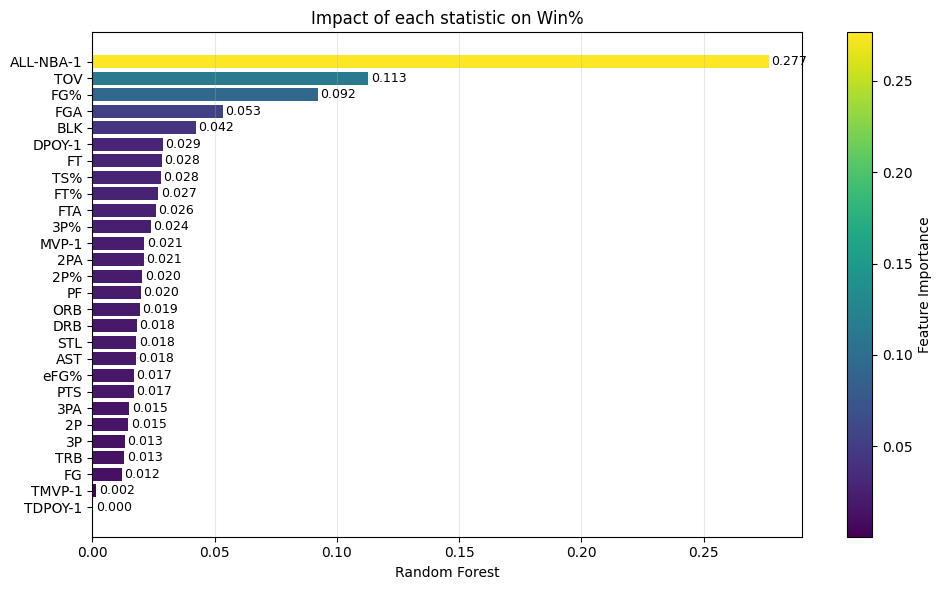

In [12]:
def run_random_forest_analysis():


    # Data prep
    nbas_df = nbas_data_full.copy() # Use a copy to avoid modifying the global DataFrame unexpectedly
    nbas_df['MP'] = pd.to_numeric(nbas_df['MP'], errors='coerce')
    nbas_df = nbas_df[nbas_df['MP'] >= 5].copy()

    stat_cols = ['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
                 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL','TS%',
                 'BLK', 'TOV', 'PF', 'PTS','TMVP-1','TDPOY-1','MVP-1','DPOY-1','ALL-NBA-1']

    # Normalize
    for col in stat_cols:
        nbas_df[col] = pd.to_numeric(nbas_df[col], errors='coerce')
        min_val, max_val = nbas_df[col].min(), nbas_df[col].max()
        if max_val > min_val:
            nbas_df[f'{col}_norm'] = (nbas_df[col] - min_val) / (max_val - min_val)

    # Aggregate & merge
    team_stats = nbas_df.groupby(['Team', 'Season'])[[f'{col}_norm' for col in stat_cols]].mean().reset_index()
    sts_df = sts_data_full.copy() # Use a copy
    sts_df['W%'] = pd.to_numeric(sts_df['W%'], errors='coerce')
    merged_df = team_stats.merge(sts_df[['Team', 'Season', 'W%']], on=['Team', 'Season'])

    X = merged_df[[f'{col}_norm' for col in stat_cols]].fillna(0)
    y = merged_df['W%'].fillna(0)

    # Train RF
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
    rf.fit(X_train, y_train)

    # Results
    importances = pd.DataFrame({
        'Stat': [f'{col}_norm' for col in stat_cols],
        'Importance': rf.feature_importances_
    }).sort_values('Importance', ascending=False)

    print(f"Test R²: {rf.score(X_test, y_test):.4f}")
    print("\nTop 10 Features:")
    print(importances.head(10))

    return rf, importances

# Run complete analysis
model, importances = run_random_forest_analysis()


top_n = 30
imp_sorted = importances.sort_values('Importance', ascending=True).tail(top_n).copy()
imp_sorted['Stat_clean'] = imp_sorted['Stat'].str.replace('_norm', '', regex=False)

values = imp_sorted['Importance'].values
norm = (values - values.min()) / (values.max() - values.min() + 1e-9)
colors = cm.viridis(norm)  # choose any cmap: viridis, plasma, coolwarm, etc.

fig, ax = plt.subplots(figsize=(10, 6)) # Explicitly create figure and axes
bars = ax.barh(imp_sorted['Stat_clean'], imp_sorted['Importance'], color=colors)
ax.set_xlabel('Random Forest')
ax.set_title(f'Impact of each statistic on Win%')
ax.grid(axis='x', alpha=0.3)

# Add value labels
for bar in bars:
    width = bar.get_width()
    ax.text(
        width + 0.001, bar.get_y() + bar.get_height()/2,
        f'{width:.3f}', va='center', fontsize=9
    )

# Optional colorbar
sm = plt.cm.ScalarMappable(cmap=cm.viridis,
                           norm=plt.Normalize(vmin=values.min(), vmax=values.max()))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax) # Pass the axes to the figure's colorbar method
cbar.set_label('Feature Importance')

plt.tight_layout()
plt.show()

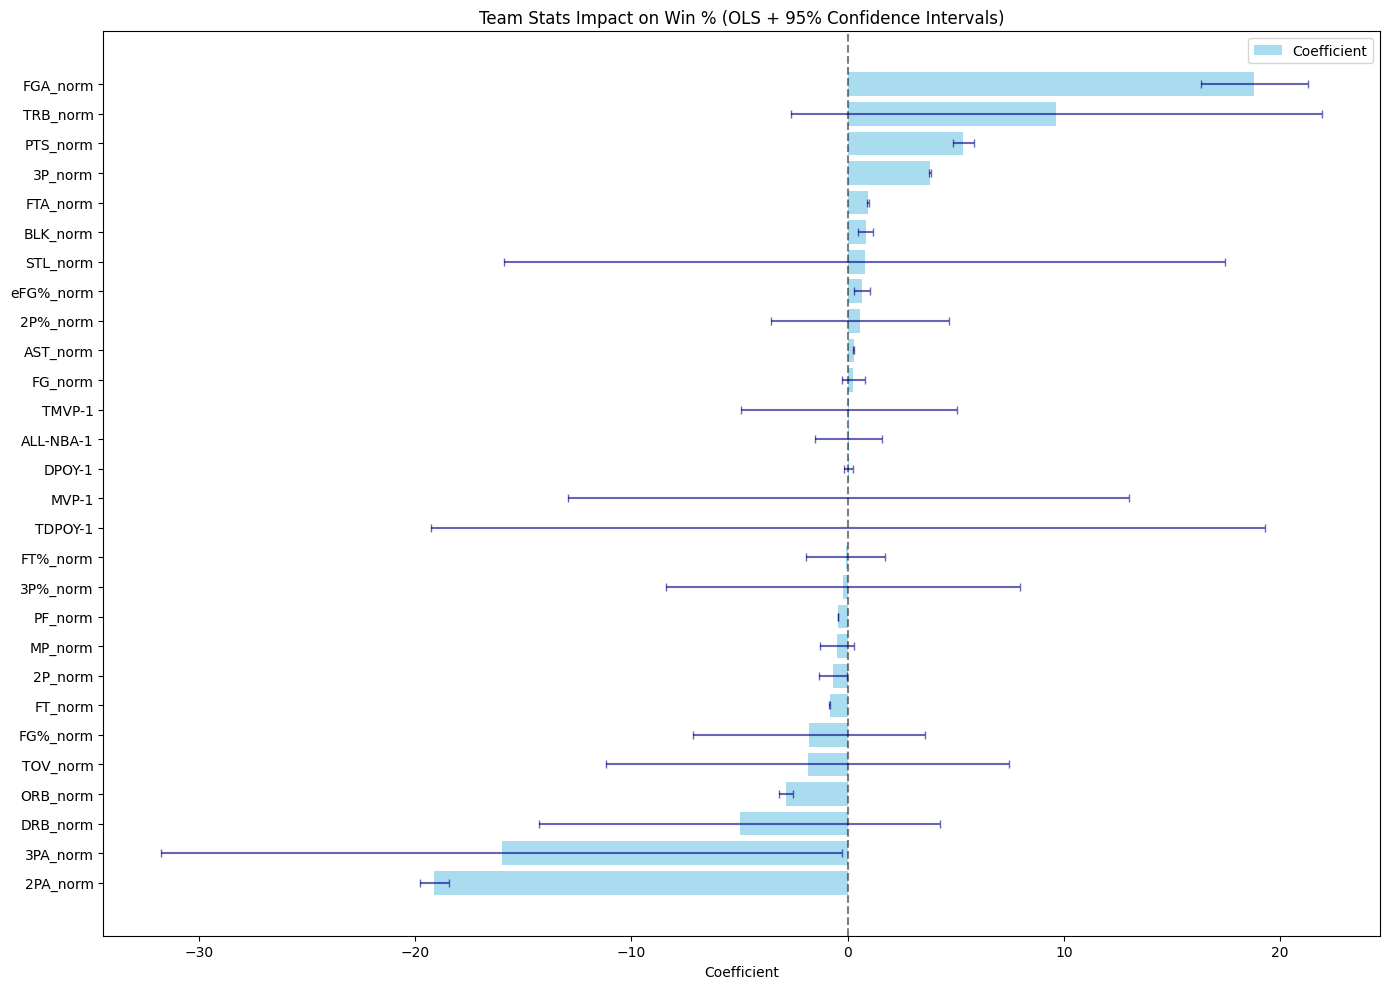

                            OLS Regression Results                            
Dep. Variable:                     W%   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     30.75
Date:                Wed, 17 Dec 2025   Prob (F-statistic):           3.53e-97
Time:                        23:08:48   Log-Likelihood:                 578.65
No. Observations:                 630   AIC:                            -1099.
Df Residuals:                     601   BIC:                            -970.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1015      0.153      7.206      0.0

In [13]:
def run_team_regression_sm():
    # Re-import statsmodels.api, we don't know why only this package need to be re imported
    import statsmodels.api as sm

    # Load & filter
    nbas_df = nbas_data_full.copy()
    nbas_df['MP'] = pd.to_numeric(nbas_df['MP'], errors='coerce')
    nbas_df = nbas_df[nbas_df['MP'] >= 5].copy()

    # Base numeric stats
    stat_cols = ['MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
                 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
                 'BLK', 'TOV', 'PF', 'PTS']

    # Ensure numeric
    for col in stat_cols:
        nbas_df[col] = pd.to_numeric(nbas_df[col], errors='coerce')

    # Award dummies -1 indicate tgat they were won the year before
    award_cols = ['MVP-1', 'DPOY-1', 'ALL-NBA-1','TMVP-1','TDPOY-1']
    for col in award_cols:
        nbas_df[col] = pd.to_numeric(nbas_df[col], errors='coerce').fillna(0).astype(int)

    # Normalize core stats 0–1, not required bu easier to interpret the coeff
    for col in stat_cols:
        min_val, max_val = nbas_df[col].min(), nbas_df[col].max()
        if max_val > min_val:
            nbas_df[f'{col}_norm'] = (nbas_df[col] - min_val) / (max_val - min_val)
        else:
            nbas_df[f'{col}_norm'] = 0.0

    # Aggregate to team-season
    agg_dict = {f'{col}_norm': 'mean' for col in stat_cols}
    agg_dict.update({col: 'max' for col in award_cols})

    team_stats = (
        nbas_df
        .groupby(['Team', 'Season'])
        .agg(agg_dict)
        .reset_index()
    )

    sts_df = sts_data_full.copy()
    sts_df['W%'] = pd.to_numeric(sts_df['W%'], errors='coerce')
    merged_df = team_stats.merge(
        sts_df[['Team', 'Season', 'W%']],
        on=['Team', 'Season']
    )

    # Features: normalized stats + award dummies
    feat_norm = [f'{col}_norm' for col in stat_cols]
    feat_awards = award_cols
    feature_cols = feat_norm + feat_awards

    X = merged_df[feature_cols].fillna(0)
    y = merged_df['W%'].fillna(0)

    # Add intercept and fit OLS, despite the result being between 0 and 1 we want a linear result
    #Logit regression would gave us prediction that are either 0W% or 100W%
    X_sm = sm.add_constant(X)
    ols_model = sm.OLS(y, X_sm).fit()

    # Coefficients table (exclude intercept for bar plot)
    coefs = (
        pd.DataFrame({
            'Stat': ['const'] + feature_cols,
            'Coefficient': ols_model.params.values
        })
        .set_index('Stat')
    )

    coefs_no_const = coefs.drop(index='const').sort_values('Coefficient')

    # Plot coefficients
    plt.figure(figsize=(14, 10))
    plt.barh(range(len(coefs_no_const)), coefs_no_const['Coefficient'],
             color='skyblue', alpha=0.7, label='Coefficient')

    # Add confidence intervals as error bars
    conf_lower = ols_model.conf_int().iloc[:, 0].drop('const')
    conf_upper = ols_model.conf_int().iloc[:, 1].drop('const')
    error = np.column_stack([coefs_no_const['Coefficient'] - conf_lower,
                            conf_upper - coefs_no_const['Coefficient']])

    plt.errorbar(coefs_no_const['Coefficient'], range(len(coefs_no_const)),
                 xerr=error.T, fmt='none', ecolor='darkblue', alpha=0.6, capsize=3)

    plt.yticks(range(len(coefs_no_const)), coefs_no_const.index)
    plt.xlabel('Coefficient')
    plt.title('Team Stats Impact on Win % (OLS + 95% Confidence Intervals)')
    plt.axvline(x=0, color='black', alpha=0.5, linestyle='--')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return ols_model, coefs_no_const

ols_model, coefficients = run_team_regression_sm()
print(ols_model.summary())

## **Modeling Prediction**

In [14]:
# First step is to update result for 2026, stored in rs2026

nbas_df =nbas_data_full
rs_df = pd.read_csv("Project_NBA_GroupM/Data/Raw/rs2026.csv", sep=';')



# Get all column names from nbas_df (to replicate exactly)
all_columns = nbas_df.columns.tolist()


# Create 2026 roster template with ALL columns matching nbas_df
roster_2026 = rs_df[['Player']].copy()
roster_2026['Team_2026'] = rs_df['Team_2026']
roster_2026['Season'] = 2026

# Set Age to last known age +1 for players in historical data
last_age = nbas_df.groupby('Player')['Age'].max().reset_index()
roster_2026 = roster_2026.merge(last_age, on='Player', how='left')
roster_2026['Age'] = roster_2026['Age'].fillna(20).astype(int) + 1  # Default 20 years for rookies

# Set Pos to most SF, we don't use Post in our regression anyway
last_pos = nbas_df.groupby('Player')['Pos'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'SF').reset_index()
roster_2026 = roster_2026.merge(last_pos, on='Player', how='left')
roster_2026['Pos'] = roster_2026['Pos'].fillna('SF')

# Fill columns with 0 or NaN to match nbas_df structure, we will fill them later
for col in all_columns:
    if col not in ['Player', 'Season', 'Age', 'Pos', 'Team_2026']:
        if col in ['Rk', 'Player-additional', 'Awards']:
            roster_2026[col] = np.nan
        else:
            roster_2026[col] = 0

roster_2026['Team'] = roster_2026['Team_2026']
roster_2026.drop('Team_2026', axis=1, inplace=True)

# Calculate awards logic exactly matching nbas_df structure
# Get 2025 data for award calculations
nbas_2025 = nbas_df[nbas_df['Season'] == 2025]

# For each roster player, get their 2025 stats (if they played)
def get_2025_awards(player_name):
    player_2025 = nbas_2025[nbas_2025['Player'] == player_name]
    if player_2025.empty:
        return {'MVP': 0, 'DPOY': 0, 'ALLNBA': 0, 'MVP-1': 0, 'DPOY-1': 0, 'ALL-NBA-1': 0}

    row = player_2025.iloc[0]
    return {
        'MVP': int(row.get('MVP', 0) >= 1),
        'DPOY': int(row.get('DPOY', 0) >= 1),
        'ALLNBA': int(row.get('ALLNBA', 0) >= 1),
        'MVP-1': int(row.get('MVP', 0) >= 1),
        'DPOY-1': int(row.get('DPOY', 0) >= 1),
        'ALL-NBA-1': int(row.get('ALLNBA', 0) >= 1)
    }

# Apply award logic with "Awards-1" if the player was nominated or won last yeas
for idx, row in roster_2026.iterrows():
    awards = get_2025_awards(row['Player'])
    roster_2026.at[idx, 'MVP'] = awards['MVP']
    roster_2026.at[idx, 'DPOY'] = awards['DPOY']
    roster_2026.at[idx, 'ALLNBA'] = awards['ALLNBA']
    roster_2026.at[idx, 'MVP-1'] = awards['MVP-1']
    roster_2026.at[idx, 'DPOY-1'] = awards['DPOY-1']
    roster_2026.at[idx, 'ALL-NBA-1'] = awards['ALL-NBA-1']

# Reorder columns to EXACTLY match nbas_df
roster_2026 = roster_2026[all_columns]

# Combine historical (2006-2025) + 2026 projection.
full_dataset = pd.concat([nbas_df, roster_2026], ignore_index=True)
full_dataset.loc[(full_dataset['Season']==2026) & full_dataset['Player'].str.contains('Jokic', case=False), 'Player'] = 'Nikola Jokić'
full_dataset.loc[(full_dataset['Season']==2026) & full_dataset['Player'].str.contains('Doncic', case=False), 'Player'] = 'Luka Dončić'

# Save complete dataset
full_dataset.to_csv('nba_full_2006_2026.csv', index=False)

print("Full dataset created: nba_full_2006_2026.csv")
print(f"Shape: {full_dataset.shape}")
print(f"Seasons: {sorted(full_dataset['Season'].unique())}")
print("\n2026 sample:")
print(full_dataset[full_dataset['Season'] == 2026][['Player', 'Team', 'Age', 'PTS', 'MVP', 'MVP-1', 'DPOY', 'DPOY-1']].sample(10))
print("\n2026 players with awards:")
print(full_dataset[(full_dataset['Season'] == 2026) &
                   ((full_dataset['MVP'] > 0) | (full_dataset['DPOY'] > 0) |
                    (full_dataset['ALLNBA'] > 0))][['Player', 'Team', 'MVP', 'DPOY', 'ALLNBA']])

Full dataset created: nba_full_2006_2026.csv
Shape: (13835, 45)
Seasons: [np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025), np.int64(2026)]

2026 sample:
                Player Team   Age  PTS  MVP  MVP-1  DPOY  DPOY-1
13676   Keaton Wallace  ATL  26.0  0.0    0      0     0       0
13766     Jaylen Clark  MIN  24.0  0.0    0      0     0       0
13794    Cason Wallace  OKC  22.0  0.0    0      0     0       0
13514  Nae'Qwan Tomlin  CLE  25.0  0.0    0      0     0       0
13518  Cade Cunningham  DET  24.0  0.0    1      1     0       0
13634   Karlo Matkovic  NOP  21.0  0.0    0      0     0       0
13313    Chris Boucher  BOS  33.0  0.0    0      0     0       0
13368     VJ Edgecombe  PHI  21.0  0.0  

In [15]:

# Use a regression to predict future statistic and fill the 2026 roster with them.
from sklearn.linear_model import LinearRegression
full_df = full_dataset

# Define numeric stat columns for regression
count_columns = ['MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA',
                 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

#Base statistic for rookie, based on previous years rookie average stat
ROOKIE_BASE = {
    'PTS': 10, 'AST': 3, 'TRB': 4, 'ORB': 2, 'DRB': 2, 'MP': 6,
    '3PA': 1, '2PA': 8, 'FTA': 1, 'BLK': 0.5, 'STL': 0.5, 'PF': 1,
    'FG': 3.5, 'FGA': 10, '3P': 0.3, '2P': 3.2, 'FT': 0.7, 'TOV': 1.5
}

# Function to create lagged features (previous 3 seasons)
def create_lagged_features(df, stat_cols, lag=3):
    lagged_df = df.copy()
    for col in stat_cols:
        for i in range(1, lag+1):
            lagged_df[f'{col}_lag{i}'] = lagged_df.groupby('Player')[col].shift(i)
    return lagged_df


lagged_df = create_lagged_features(full_df, count_columns)

# Predict 2026 stats by using previous years statistics
def predict_2026_stats(lagged_df, stat_cols):
    predictions = {}

    for stat in stat_cols:
        lag_features = [f'{stat}_lag{i}' for i in range(1, 4)]
        mask_2026 = (lagged_df['Season'] == 2026)

        valid_players = lagged_df[mask_2026].copy()
        veterans = valid_players[valid_players[lag_features].notna().any(axis=1)]

        if not veterans.empty:

            train_mask = (lagged_df['Season'] >= 2009) & (lagged_df[lag_features].notna().all(axis=1))
            X_train = lagged_df.loc[train_mask, lag_features].fillna(0)
            y_train = lagged_df.loc[train_mask, stat]

            #regression model
            X_2026 = veterans[lag_features].fillna(0)
            model = LinearRegression()
            model.fit(X_train, y_train)
            pred_stats = model.predict(X_2026)
            # use model to predict the future stats of player
            for idx, row in veterans.iterrows():
                player = row['Player']
                predictions.setdefault(player, {})[stat] = max(0, pred_stats[veterans.index.get_loc(idx)])

    return predictions


stat_predictions = predict_2026_stats(lagged_df, count_columns)

# Fill 2026 roster with predicted value
full_df.loc[full_df['Season'] == 2026, count_columns] = 0  # Reset all to 0 to be sure

for player, stats in stat_predictions.items():
    mask = (full_df['Season'] == 2026) & (full_df['Player'] == player)
    for stat, value in stats.items():
        full_df.loc[mask, stat] = round(value, 1)

# Apply base stat for rookie as we don't have information to predict their performance
mask_2026 = full_df['Season'] == 2026
rookie_mask = mask_2026 & (full_df['PTS'] == 0)

for stat, base_value in ROOKIE_BASE.items():
    full_df.loc[rookie_mask, stat] = round(base_value, 1)

# Manually compute shooting percentage

full_df.loc[mask_2026, 'FG%'] = full_df.loc[mask_2026, 'FG'] / full_df.loc[mask_2026, 'FGA'].replace(0, np.nan)
full_df.loc[mask_2026, '3P%'] = full_df.loc[mask_2026, '3P'] / full_df.loc[mask_2026, '3PA'].replace(0, np.nan)
full_df.loc[mask_2026, '2P%'] = full_df.loc[mask_2026, '2P'] / full_df.loc[mask_2026, '2PA'].replace(0, np.nan)
full_df.loc[mask_2026, 'FT%'] = full_df.loc[mask_2026, 'FT'] / full_df.loc[mask_2026, 'FTA'].replace(0, np.nan)

# Includede crafted metric
full_df.loc[mask_2026, 'eFG%'] = (full_df.loc[mask_2026, 'FG'] + 0.5 * full_df.loc[mask_2026, '3P']) / full_df.loc[mask_2026, 'FGA'].replace(0, np.nan)
full_df.loc[mask_2026, 'TS%'] = full_df.loc[mask_2026, 'PTS'] / (2 * full_df.loc[mask_2026, 'FGA'] + 0.44 * full_df.loc[mask_2026, 'FTA']).replace(0, np.nan)

# Fill NaN percentages with historical averages
for pct_col in ['FG%', '3P%', '2P%', 'FT%', 'eFG%', 'TS%']:
    hist_mean = full_df[full_df['Season'] < 2026][pct_col].mean()
    full_df.loc[mask_2026 & full_df[pct_col].isna(), pct_col] = hist_mean

full_df.loc[(full_df['Player'] == 'Shai Gilgeous-Alexander') & (full_df['Season'] == 2026), 'TMVP-1'] = 1
full_df.loc[(full_df['Player'] == 'Evan Mobley') & (full_df['Season'] == 2026), 'TDPOY-1'] = 1
full_df.loc[(full_df['Player'] == 'Luka Dončić') & (full_df['Season'] == 2026), 'MVP-1'] = 1
full_df.loc[(full_df['Player'] == 'Nikola Jokić') & (full_df['Season'] == 2026), 'MVP-1'] = 1

# Save final dataset
full_df.to_csv('nba_full_2006_2026_predicted.csv', index=False)

# Summary stats
pred_2026 = full_df[full_df['Season'] == 2026]
n_veterans = len(stat_predictions)
n_rookies = len(pred_2026[pred_2026['PTS'] == 10.0])  # Exact rookie PTS


print(f"   → {n_veterans} veterans (pure regression)")
print(f"   → {n_rookies} rookies (base values only)")

print("Top 20 predicted 2026 performers:")
top_performers = pred_2026.nlargest(30, 'PTS')[['Player', 'Team', 'PTS', '3PA', '3P%', 'TMVP-1', 'TOV', 'MVP-1','ALL-NBA-1', 'TS%']].round(1)
print(top_performers.head(20))

   → 404 veterans (pure regression)
   → 119 rookies (base values only)
Top 20 predicted 2026 performers:
                        Player Team   PTS  3PA  3P%  TMVP-1  TOV  MVP-1  \
13787  Shai Gilgeous-Alexander  OKC  27.5  4.5  0.4       1  2.1      1   
13554    Giannis Antetokounmpo  MIL  26.2  1.2  0.3       0  2.8      1   
13432              Luka Dončić  LAL  24.4  8.3  0.4       0  3.1      1   
13755             Nikola Jokić  DEN  24.3  3.6  0.4       0  3.0      1   
13770          Anthony Edwards  MIN  23.5  8.0  0.4       0  2.8      1   
13349            Jalen Brunson  NYK  23.4  5.5  0.4       0  2.1      1   
13370              Joel Embiid  PHI  23.4  3.6  0.3       0  3.0      0   
13592             Kevin Durant  HOU  23.2  5.1  0.4       0  2.7      0   
13325             Jayson Tatum  BOS  23.1  8.2  0.4       0  2.4      1   
13375             Tyrese Maxey  PHI  22.9  7.7  0.3       0  1.8      0   
13449             Devin Booker  PHO  22.5  6.1  0.3       0  2.4     

   Total Wins:  1230 ✓
   Total Losses: 1230 ✓
   Adjustments made: 467

 PREDICTED 2026 NBA STANDINGS
   Team  W%_predicted  W_pred  L_pred W-L_pred
29  OKC          0.94      62      20    62-20
27  DEN          0.80      51      31    51-31
28  GSW          0.80      51      31    51-31
25  CLE          0.79      50      32    50-32
26  LAC          0.79      50      32    50-32
24  MIL          0.77      48      34    48-34
23  SAC          0.76      47      35    47-35
21  ATL          0.73      45      37    45-37
22  MIA          0.73      45      37    45-37
19  NYK          0.72      44      38    44-38
18  MIN          0.71      44      38    44-38
20  IND          0.72      44      38    44-38
17  BOS          0.69      42      40    42-40
13  BRK          0.68      40      42    40-42
16  NOP          0.69      40      42    40-42
15  HOU          0.68      40      42    40-42
14  SAS          0.68      40      42    40-42
11  DET          0.67      39      43    39-43
12  

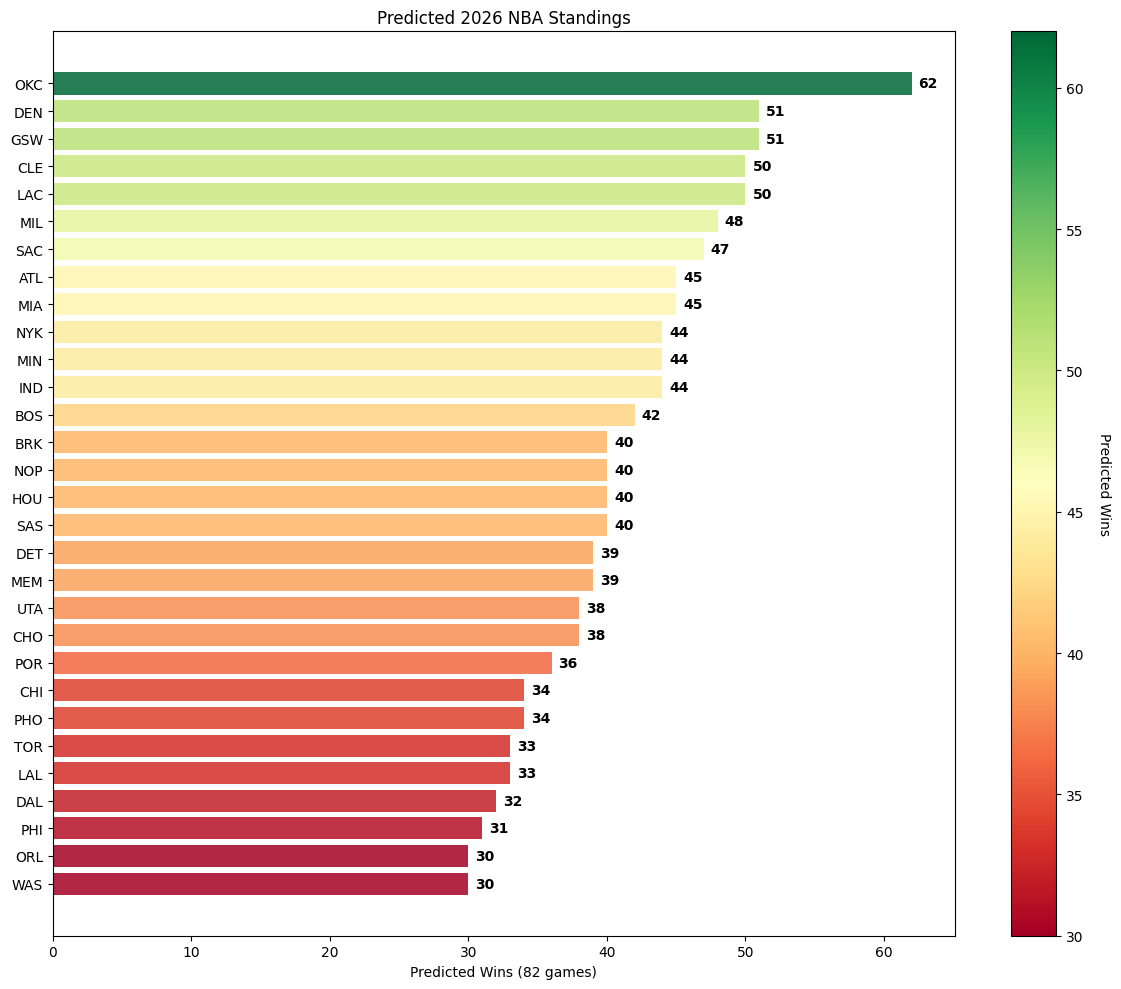

In [16]:
import statsmodels.api as sm
import random
from matplotlib.colors import LinearSegmentedColormap

# Load predicted 2026 data
full_df_2026 = pd.read_csv('nba_full_2006_2026_predicted.csv')
nbas_data_full = full_df_2026[full_df_2026['Season'] < 2026].copy()

def predict_2026_standings_random_adjust(ols_model):

    # Filter 2026 predicted player stats
    nbas_2026 = full_df_2026[full_df_2026['Season'] == 2026].copy()
    nbas_2026['MP'] = pd.to_numeric(nbas_2026['MP'], errors='coerce')
    nbas_2026 = nbas_2026[nbas_2026['MP'] >= 5].copy()

    stat_cols = ['MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
                 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
                 'BLK', 'TOV', 'PF', 'PTS']


    for col in stat_cols:
        nbas_2026[col] = pd.to_numeric(nbas_2026[col], errors='coerce')

    # Award columns
    award_cols = ['MVP-1', 'DPOY-1', 'ALL-NBA-1','TMVP-1','TDPOY-1']
    for col in award_cols:
        if col in nbas_2026.columns:
            nbas_2026[col] = pd.to_numeric(nbas_2026[col], errors='coerce').fillna(0).astype(int)
        else:
            nbas_2026[col] = 0

    # Normalize using historical ranges
    for col in stat_cols:
        min_val, max_val = nbas_data_full[col].min(), nbas_data_full[col].max()
        if max_val > min_val:
            nbas_2026[f'{col}_norm'] = (nbas_2026[col] - min_val) / (max_val - min_val)
        else:
            nbas_2026[f'{col}_norm'] = 0.0

    # Aggregate to team-season
    agg_dict = {f'{col}_norm': 'mean' for col in stat_cols}
    agg_dict.update({col: 'max' for col in award_cols})

    team_stats_2026 = (
        nbas_2026
        .groupby(['Team', 'Season'])
        .agg(agg_dict)
        .reset_index()
    )


    feat_norm = [f'{col}_norm' for col in stat_cols]
    feat_awards = award_cols
    feature_cols = feat_norm + feat_awards

    X_2026 = team_stats_2026[feature_cols].fillna(0)

    #Predict W% using our predicted statistics
    X_2026_sm = sm.add_constant(X_2026)
    win_pct_pred = ols_model.predict(X_2026_sm)

    # Multiply W% by 82 to have the predicted numer of win
    team_stats_2026['W%_predicted'] = win_pct_pred
    team_stats_2026['W_pred'] = (win_pct_pred * 82).round(0).astype(int)
    team_stats_2026['L_pred'] = 82 - team_stats_2026['W_pred']

    # This is an important part of the code, the predicted Win % is at the team level not league level
    #This mean that total win or loss aren't equal to the total match played in a season 1230
    #We decided to fix it by removing/adding W or L until total W=total L=1230



    target_total = 1230
    total_wins = team_stats_2026['W_pred'].sum()

    adjustment_log = []

    # Sort once by predicted W% (ascending: worst → best)
    team_stats_2026 = team_stats_2026.sort_values('W%_predicted', ascending=True).reset_index(drop=True)

    i = 0
    while total_wins != target_total:
        diff = target_total - total_wins

        if diff > 0:  # Need +1 win → give wins starting from worst teams
            idx = i % len(team_stats_2026)
            team_stats_2026.at[idx, 'W_pred'] += 1
            team_stats_2026.at[idx, 'L_pred'] -= 1
            adjustment_log.append(f"+1W to {team_stats_2026.at[idx, 'Team']}")
        else:        # Need -1 win → take wins starting from worst teams
            idx = i % len(team_stats_2026)
            team_stats_2026.at[idx, 'W_pred'] -= 1
            team_stats_2026.at[idx, 'L_pred'] += 1
            adjustment_log.append(f"-1W from {team_stats_2026.at[idx, 'Team']}")

        total_wins = team_stats_2026['W_pred'].sum()
        i += 1

    # Final formatting
    team_stats_2026['W-L_pred'] = (
        team_stats_2026['W_pred'].astype(str) + '-' + team_stats_2026['L_pred'].astype(str)
    )

    print(f"   Total Wins:  {team_stats_2026['W_pred'].sum():3d} ✓")
    print(f"   Total Losses: {team_stats_2026['L_pred'].sum():3d} ✓")
    print(f"   Adjustments made: {len(adjustment_log)}")

    return team_stats_2026.sort_values('W_pred', ascending=False), adjustment_log

# Call the function and assign its results to team_predictions_2026 and adjustment_log
team_predictions_2026, adjustment_log = predict_2026_standings_random_adjust(ols_model)

print("\n PREDICTED 2026 NBA STANDINGS")
print("=" * 70)
display_df = team_predictions_2026[['Team', 'W%_predicted', 'W_pred', 'L_pred', 'W-L_pred']].round(2)
print(display_df)



# Save results
team_predictions_2026.to_csv('2026_nba_standings_random_adjust.csv', index=False)
print("\nSaved to 2026_nba_standings_random_adjust.csv")



# Bar chart color graded
plt.figure(figsize=(12, 10))

# Create color gradient (low wins = red, high wins = green)
norm = plt.Normalize(team_predictions_2026['W_pred'].min(), team_predictions_2026['W_pred'].max())
colors = plt.cm.RdYlGn(norm(team_predictions_2026['W_pred']))

bars = plt.barh(range(len(team_predictions_2026)), team_predictions_2026['W_pred'], color=colors, alpha=0.85)

# Add value labels on bars
for i, (bar, wins) in enumerate(zip(bars, team_predictions_2026['W_pred'])):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{int(wins)}', va='center', fontsize=10, fontweight='bold')

plt.yticks(range(len(team_predictions_2026)), team_predictions_2026['Team'])
plt.xlabel('Predicted Wins (82 games)')
plt.title('Predicted 2026 NBA Standings')
plt.gca().invert_yaxis()


sm = plt.cm.ScalarMappable(cmap=plt.cm.RdYlGn, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Predicted Wins', rotation=270, labelpad=20)

plt.tight_layout()
plt.show()

In [18]:


def evaluate_ols_ranking_accuracy(ols_model, nbas_data_full, sts_data_full):
    # Same stat/award columns as our regression model
    stat_cols = ['MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%',
                 'eFG%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL',
                 'BLK','TOV','PF','PTS']
    award_cols = ['MVP-1','DPOY-1','ALL-NBA-1','TMVP-1','TDPOY-1']

    df = nbas_data_full.copy()
    df['MP'] = pd.to_numeric(df['MP'], errors='coerce')
    df = df[df['MP'] >= 5].copy()

    # Normalize stats
    for col in stat_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        mn, mx = df[col].min(), df[col].max()
        df[f'{col}_norm'] = 0.0 if mx <= mn else (df[col] - mn) / (mx - mn)


    for col in award_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

  # aggregate at the team level and lerge with sts
    agg_dict = {f'{col}_norm': 'mean' for col in stat_cols}
    agg_dict.update({col: 'max' for col in award_cols})
    team_stats = df.groupby(['Team','Season']).agg(agg_dict).reset_index()


    sts = sts_data_full.copy()
    sts['W%'] = pd.to_numeric(sts['W%'], errors='coerce')
    merged = team_stats.merge(sts[['Team','Season','W%']], on=['Team','Season'])

    # Rerun the regression we used for our prediciton
    feat_norm = [f'{c}_norm' for c in stat_cols]
    feature_cols = feat_norm + award_cols
    X = merged[feature_cols].fillna(0)
    y = merged['W%']

    X_sm = sm.add_constant(X)
    merged['W%_pred'] = ols_model.predict(X_sm)

    seasons = sorted(merged['Season'].unique())
    seasons = [s for s in seasons if 2006 <= s <= 2025]


    champ_rows = []
    champ_correct = 0


    rank_rows = []

    for season in seasons:
        sub = merged[merged['Season'] == season].copy()

        # Actually rank team based on W%, for both real and predicted result
        sub = sub.sort_values('W%', ascending=False)
        sub['Actual_rank'] = np.arange(1, len(sub) + 1)


        sub = sub.sort_values('W%_pred', ascending=False)
        sub['Pred_rank'] = np.arange(1, len(sub) + 1)


        sub = sub.sort_values('Actual_rank')


        actual_best_row = sub.loc[sub['Actual_rank'] == 1].iloc[0]
        pred_best_row = sub.loc[sub['Pred_rank'] == 1].iloc[0]
        actual_team = actual_best_row['Team']
        pred_team = pred_best_row['Team']
        is_correct = int(actual_team == pred_team)
        champ_correct += is_correct

        champ_rows.append({
            'Season': season,
            'Actual_best_team': actual_team,
            'Pred_best_team': pred_team,
            'Correct': is_correct
        })

        # Calculate the Mean Accuracy Error = average number of rank between reality and prediction
        sub['Rank_error'] = (sub['Pred_rank'] - sub['Actual_rank']).abs()
        mae = sub['Rank_error'].mean()

        for _, row in sub.iterrows():
            rank_rows.append({
                'Season': season,
                'Team': row['Team'],
                'Actual_rank': int(row['Actual_rank']),
                'Pred_rank': int(row['Pred_rank']),
                'Rank_error': float(row['Rank_error'])
            })

    champ_results = pd.DataFrame(champ_rows)
    rank_results = pd.DataFrame(rank_rows)

    # Overall champion accuracy
    champ_accuracy = champ_correct / len(seasons)

    # Per-season and overall rank accuracy
    season_mae = rank_results.groupby('Season')['Rank_error'].mean().reset_index(name='MAE_rank')
    overall_mae = rank_results['Rank_error'].mean()

    print("Champion prediction by season:")
    print(champ_results)
    print(f"\nChampion accuracy (2006–2025): {champ_accuracy:.3f} "
          f"({champ_correct}/{len(seasons)} seasons)")

    print("\nMean Absolute Rank Error (MAE) by season:")
    print(season_mae)

    print(f"\nOverall Mean Absolute Rank Error (all teams, all seasons): {overall_mae:.3f}")

    return champ_results, rank_results, season_mae, champ_accuracy, overall_mae

champ_results, rank_results, season_mae, champ_acc, overall_mae = \
    evaluate_ols_ranking_accuracy(ols_model, nbas_data_full, sts_data_full)


Champion prediction by season:
    Season Actual_best_team Pred_best_team  Correct
0     2006              DET            DAL        0
1     2007              DAL            PHO        0
2     2008              BOS            LAL        0
3     2009              CLE            LAL        0
4     2010              CLE            CLE        1
5     2011              CHI            MIA        0
6     2012              CHI            MIA        0
7     2013              MIA            MIA        1
8     2014              SAS            SAS        1
9     2015              GSW            GSW        1
10    2016              GSW            GSW        1
11    2017              GSW            GSW        1
12    2018              HOU            GSW        0
13    2019              MIL            GSW        0
14    2020              MIL            MIL        1
15    2021              UTA            PHI        0
16    2022              PHO            PHI        0
17    2023              MIL      